# DiploDatos 2021


### Categorización de publicaciones de productos realizadas en Mercado Libre

### 01 - Análisis y Visualización

#### Condiciones generales que aplican a todos los prácticos:
   - Las notebooks tienen que ser 100% reproducibles, es decir al ejecutar las celdas tal cuál como se entrega la notebook se deben obtener los mismos resultados sin errores.
   - Código legible, haciendo buen uso de las celdas de la notebook y en lo posible seguir estándares de código para Python (https://www.python.org/dev/peps/pep-0008/).
   - Utilizar celdas tipo "Markdown" para ir guiando el análisis.
   - Limpiar el output de las celdas antes de entregar el notebook (ir a Kernel --> Restart Kernel and Clear All Ouputs).
   - Incluir conclusiones del análisis que se hizo en la sección "Conclusiones". Tratar de aportar valor en esta sección, ser creativo! 

## 1. Consignas

#### Sección A:  Estadísticas básicas & Visualizaciones

Por cada uno de los siguientes puntos realizar un análisis para poder responder el enunciado/pregunta y generar alguna gráfica para visualizar los resultados:

1. Cuántas publicaciones de items hay dentro de cada categoría.
2. Proporción de publicaciones en español y portugues dentro de cada categoría.
3. Proporción de label quality dentro de cada categoría.
4. Relación entre el label quality y el idioma.

#### Sección B: Estadísticas de las publicaciones & Visualizaciones

Por cada uno de los siguientes puntos realizar un análisis para poder responder el enunciado/pregunta y generar alguna gráfica para visualizar los resultados:

1. Cantidad promedio de palabras del título de la publicacion por categoría.
2. Análisis general de stopwords, números, caracteres especiales, etc. Puede ser un recuento promedio por publicación, no es necesario realizar una gráfica en este punto.
3. Palabras más frecuentes dentro de cada categoría (sin incluir stopwords, números, caracteres especiales, etc).

Tener en cuenta librerías como *NLTK* y *spaCy* para el procesamiento de texto.

## 2. Código y análisis

Imports necesarios

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

import warnings
warnings.filterwarnings("ignore")




# Para la sección B

# pip install seaborn
# pip install --user -U nltk
# pip install -U spacy

import spacy

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download("stopwords")

stopwords = \
    set(nltk.corpus.stopwords.words("spanish")) | \
    set(nltk.corpus.stopwords.words("portuguese"))

count_stopwords = lambda s: sum(
    w.lower() in stopwords for w in word_tokenize(s)
)

def count_special_chars(s):
    word_freq = nltk.FreqDist(s)
    special_chars = "[@_!#$%^&*()<>?/\|}{~:]"
    return sum(word_freq[sc] for sc in special_chars)

def count_digits(s):
    word_freq =  nltk.FreqDist(s)
    digits = "0123456789"
    return sum(word_freq[d] for d in digits)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\edu_b\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Lectura de dataset reducido

In [2]:
URL = "https://www.famaf.unc.edu.ar/~nocampo043/ml_challenge2019_dataset.csv"
df= pd.read_csv(URL)

In [3]:
df.head(20)

,title,label_quality,language,category
0,Galoneira Semi Industrial,unreliable,portuguese,SEWING_MACHINES
1,Máquina De Coser Brother Industrial,unreliable,spanish,SEWING_MACHINES
2,Teclado Casio Wk-240 76 Teclas Profissional St...,unreliable,portuguese,MUSICAL_KEYBOARDS
3,Heladera Gafa 380 Impecable Urgente,unreliable,spanish,REFRIGERATORS
4,Butaca 6 Cuotas Sin Interes!! Para Auto Bebes...,unreliable,spanish,BABY_CAR_SEATS
5,Reloj De Pared - Varios Modelos,unreliable,spanish,WALL_CLOCKS
6,Teclado Sintetizador Moxf8 Preto Yamaha,unreliable,portuguese,MUSICAL_KEYBOARDS
7,Coche Travel System Graco Modes Trinidad C/ Hu...,unreliable,spanish,BABY_STROLLERS
8,Bermuda Les Mills Mujer Nuevo Exclusivo Import...,unreliable,spanish,SHORTS
9,Geladeira Eletrolux Rd30,unreliable,portuguese,REFRIGERATORS


## Sección A

**Definimos de antemano una función PROPORTION que será aplicada pará responder varias de las preguntas; nos devuelve un dataframe que compara 2 categorías del df.**

In [4]:
title = "title"
category = "category"
label_quality = "label_quality"
language = "language"

def proportion(df, by, col):
    df_proportion = df.groupby([by, col]) \
        .agg(count=(col, "count")) \
        .join(df.groupby(by).size() \
        .to_frame()) \
        .rename(columns={0: "total"})

    df_proportion["proportion"] = df_proportion["count"] / df_proportion["total"]
    return df_proportion

## Cuántas publicaciones de items hay dentro de cada categoría.

In [5]:
df.groupby("category").size()

category
BABY_CAR_SEATS        34163
BABY_STROLLERS        31353
COFFEE_MAKERS         35104
ELECTRIC_DRILLS       30820
HAIR_CLIPPERS         32372
KITCHEN_SINKS         30635
MATTRESSES            32967
MEMORY_CARDS          31564
MOTORCYCLE_JACKETS    32615
MUSICAL_KEYBOARDS     33222
PANTS                 35973
PUREBRED_DOGS         32928
RANGES                32645
REFRIGERATORS         32635
ROLLER_SKATES         31371
SEWING_MACHINES       31129
SHORTS                31685
SUITCASES             31580
WALL_CLOCKS           30600
WINES                 31399
dtype: int64

**Gráfico de barras para las frecuencias de las categorías:**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'SEWING_MACHINES'),
  Text(1, 0, 'MUSICAL_KEYBOARDS'),
  Text(2, 0, 'REFRIGERATORS'),
  Text(3, 0, 'BABY_CAR_SEATS'),
  Text(4, 0, 'WALL_CLOCKS'),
  Text(5, 0, 'BABY_STROLLERS'),
  Text(6, 0, 'SHORTS'),
  Text(7, 0, 'SUITCASES'),
  Text(8, 0, 'PUREBRED_DOGS'),
  Text(9, 0, 'ROLLER_SKATES'),
  Text(10, 0, 'COFFEE_MAKERS'),
  Text(11, 0, 'WINES'),
  Text(12, 0, 'MATTRESSES'),
  Text(13, 0, 'PANTS'),
  Text(14, 0, 'MEMORY_CARDS'),
  Text(15, 0, 'ELECTRIC_DRILLS'),
  Text(16, 0, 'MOTORCYCLE_JACKETS'),
  Text(17, 0, 'HAIR_CLIPPERS'),
  Text(18, 0, 'RANGES'),
  Text(19, 0, 'KITCHEN_SINKS')])

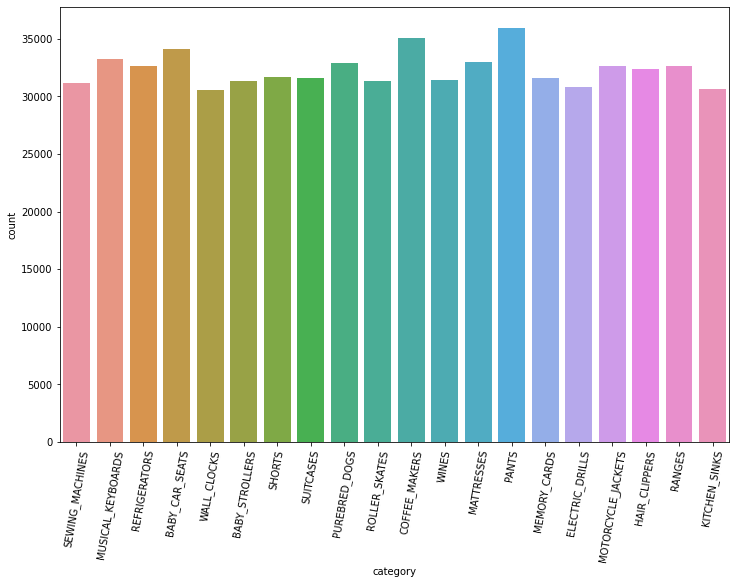

In [6]:
fig = plt.figure(figsize=(12,8))
seaborn.countplot(data=df, x='category')
plt.xticks(rotation=80)

**Estamos trabajando con el dataset reducido, para el cual sólo se tomaron las categorías con maás de 30000 publicaciones.**

**Se ve que las cantidades son muy similares, de hecho:**

In [7]:
max(list(df.groupby("category").size()))

35973

In [8]:
min(list(df.groupby("category").size()))

30600

**La cantidad de productos por categoría varía relativamente poco, están todas entre 30600 y 36000.**

## Proporción de publicaciones en español y portugues dentro de cada categoría.

**Aplicamos la función PROPORTION a las columnas "category" y "language"**

In [9]:
proportion(df, category, language)

count  total  proportion
category           language                            
BABY_CAR_SEATS     portuguese  16290  34163    0.476832
                   spanish     17873  34163    0.523168
BABY_STROLLERS     portuguese  16244  31353    0.518100
                   spanish     15109  31353    0.481900
COFFEE_MAKERS      portuguese  17607  35104    0.501567
                   spanish     17497  35104    0.498433
ELECTRIC_DRILLS    portuguese  15044  30820    0.488125
                   spanish     15776  30820    0.511875
HAIR_CLIPPERS      portuguese  16474  32372    0.508897
                   spanish     15898  32372    0.491103
KITCHEN_SINKS      portuguese  14794  30635    0.482912
                   spanish     15841  30635    0.517088
MATTRESSES         portuguese  17310  32967    0.525071
                   spanish     15657  32967    0.474929
MEMORY_CARDS       portuguese  18257  31564    0.578412
                   spanish     13307  31564    0.421588
MOTORCYCLE_JACKETS portuguese  17079  32615    0.523655
                   spanish     15536  32615    0.476345
MUSICAL_KEYBOARDS  portuguese  15655  33222    0.471224
                   spanish     17567  33222    0.528776
PANTS              portuguese  18689  35973    0.519529
                   spanish     17284  35973    0.480471
PUREBRED_DOGS      portuguese  17909  32928    0.543884
                   spanish     15019  32928    0.456116
RANGES             portuguese  15140  32645    0.463777
                   spanish     17505  32645    0.536223
REFRIGERATORS      portuguese  14750  32635    0.451969
                   spanish     17885  32635    0.548031
ROLLER_SKATES      portuguese  17425  31371    0.555449
                   spanish     13946  31371    0.444551
SEWING_MACHINES    portuguese  14395  31129    0.462431
                   spanish     16734  31129    0.537569
SHORTS             portuguese  16051  31685    0.506580
                   spanish     15634  31685    0.493420
SUITCASES          portuguese  17358  31580    0.549652
                   spanish     14222  31580    0.450348
WALL_CLOCKS        portuguese  17335  30600    0.566503
                   spanish     13265  30600    0.433497
WINES              portuguese  15186  31399    0.483646
                   spanish     16213  31399    0.516354

Miramos el mínimo de la columna proportion:

In [10]:
proportion(df, category, language).proportion.min()

0.42158788493220123

Esto nos dice que para todas las categorías, cada uno de los 2 idiomas tiene entre un 42% y un 58% de las publicaciones.

¿Qué sucede para el total de los casos?

In [11]:
spa=df[df.language=="spanish"].shape[0]
tot=df.shape[0]
cadena="En general, del total de {} publicaciones: \n\n\t".format(tot)+ ("{} ({}%) son en español, \n\t" \
+ "{} ({}%) son en portugués.").format(spa,str(100*spa/tot)[:5], tot-spa, str(100*(tot-spa)/tot)[:5] )
print(cadena)

En general, del total de 646760 publicaciones: 

	317768 (49.13%) son en español, 
	328992 (50.86%) son en portugués.


Para cada categoría, tomamos la menor de las 2 proporciones. A todas ellas, las ponemos en una lista y las ordenamos:

In [12]:
columna_proporcion=list(proportion(df, category, language).proportion)
proporciones_menores=sorted([min(columna_proporcion[2*i],columna_proporcion[2*i+1]) \
                             for i in range(int(len(columna_proporcion)/2))
                            ])
proporciones_menores

[0.42158788493220123,
 0.4334967320261438,
 0.44455069969079725,
 0.45034832172260925,
 0.4519687452121955,
 0.4561163751214772,
 0.4624305310160943,
 0.4637769949456272,
 0.4712238877852026,
 0.4749294749294749,
 0.4763452399202821,
 0.47683165998302257,
 0.48047146470964336,
 0.4818996587248429,
 0.4829117023012894,
 0.4836459759864964,
 0.4881245944192083,
 0.4911034227109848,
 0.49341959917942246,
 0.49843322698268006]

Ya sabíamos que para todas las categorías, el idioma menos frecuente tiene al memos un 42% de las publicaciones.

Para 8 de las 20 categorías, ambos idiomas están entre un 48% y un 52% de las publicaciones.

Para 12 de las 20 categorías, ambos idiomas están entre un 47% y un 53% de las publicaciones.

Para 17 de las 20 categorías, ambos idiomas están entre un 45% y un 55% de las publicaciones.

**Gráfico de barras en el que se aprecia la similaridad entre la cantidad de publicaciones entre ambos idiomas, para todas las categorías:**

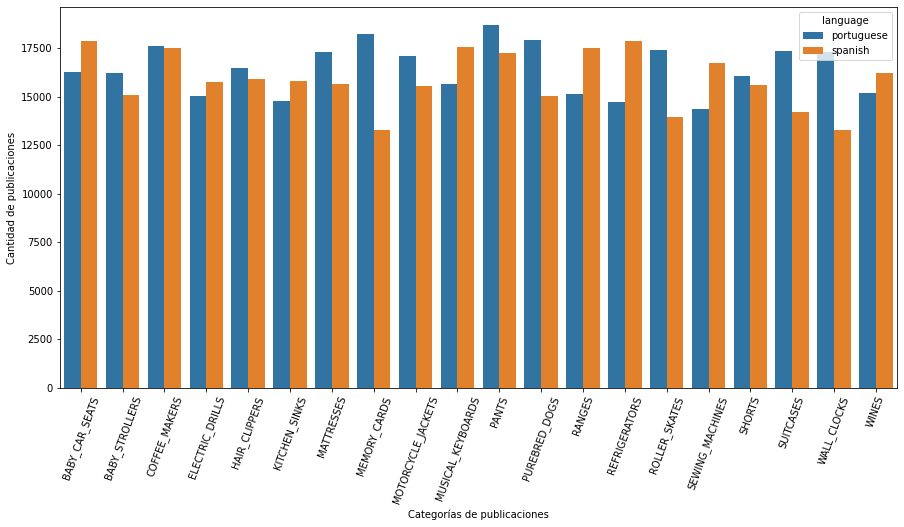

In [13]:
df_language_by_category = proportion(df, category, language).reset_index()
fig = plt.figure(figsize=(15,7))
seaborn.barplot(
    y=df_language_by_category["count"],
    x=df_language_by_category["category"],
    hue=df_language_by_category["language"],
    ci=None
)
plt.xticks(rotation=70)
plt.ylabel("Cantidad de publicaciones")
plt.xlabel("Categorías de publicaciones")
plt.ticklabel_format(style='plain', axis='y')

## 3. Proporción de label quality dentro de cada categoría.


**Aplicamos la función PROPORTION a las columnas "category" y "label_quality"", agregando un sort_values que será conveniente.**

In [14]:
proportion(df, category, label_quality).sort_values(by="proportion")

,,count,total,proportion
category,label_quality,,,
WINES,reliable,911,31399,0.029014
KITCHEN_SINKS,reliable,2257,30635,0.073674
WALL_CLOCKS,reliable,2854,30600,0.093268
ELECTRIC_DRILLS,reliable,3061,30820,0.099319
SHORTS,reliable,3480,31685,0.109831
SEWING_MACHINES,reliable,3533,31129,0.113495
MOTORCYCLE_JACKETS,reliable,4283,32615,0.131320
RANGES,reliable,4845,32645,0.148415
HAIR_CLIPPERS,reliable,4833,32372,0.149296


Para ninguna categoría la proporción de "reliables" es mayor a 0.222945

In [15]:
reli=df[df.label_quality=="reliable"].shape[0]
tot=df.shape[0]
cadena="En general, del total de {} publicaciones: \n\n\t".format(tot)+ ("{} ({}%) son RELIABLE, \n\t" \
+ "{} ({}%) son UNRELIABLE.").format(reli,str(100*reli/tot)[:5], tot-reli, str(100*(tot-reli)/tot)[:5] )
print(cadena)

En general, del total de 646760 publicaciones: 

	94882 (14.67%) son RELIABLE, 
	551878 (85.32%) son UNRELIABLE.


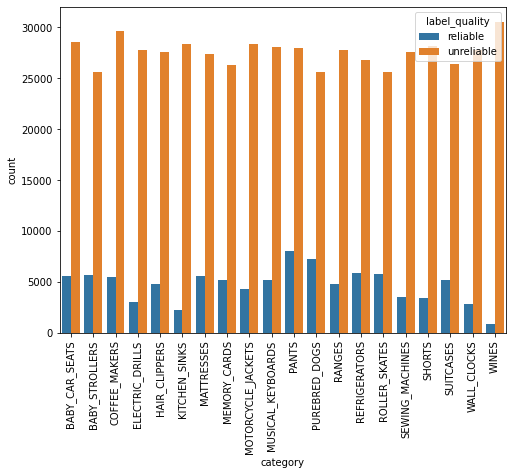

In [16]:
df_label_by_category = proportion(df, category, label_quality).reset_index()
fig = plt.figure(figsize=(8,6))
seaborn.barplot(
    y=df_label_by_category["count"],
    x=df_label_by_category["category"],
    hue=df_label_by_category["label_quality"],
    ci=None
)
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')

Se ve que hay aún relativamente pocas publicaciones etiquetadas como **reliable**. 

## Relación entre el label quality y el idioma.

**Aplicamos la función PROPORTION a "language" y "label_quality".**

In [17]:
proportion(df, language, label_quality)

count   total  proportion
language   label_quality                            
portuguese reliable        50519  328992    0.153557
           unreliable     278473  328992    0.846443
spanish    reliable        44363  317768    0.139608
           unreliable     273405  317768    0.860392

Las proporciones de RELIABLES para portugués y para español son parecidas, de un 15% y un 13% respectivamente.

Recordamos además que del total de publicaciones el 14,67 % son RELIABLE.

Esto nos hace que pensar que hay independencia entre "language" y "label_quality".

Tomando los 2 valores de cada una de esas columnas, tenemos 4 casos posibles:

In [18]:
pd.crosstab(
    df.language,
    df.label_quality
)

label_quality,reliable,unreliable
language,,
portuguese,50519,278473
spanish,44363,273405


Las columnas "language" y "label_quality" son independientes si para cada **idioma** y **calidad**:$$P(language=idioma)*P(labelquality=calidad) \quad=\quad P(language=idioma \wedge labelquality=calidad)$$

A continuación, para cada uno de los 4 casos calculamos el cociente entre esas probabilidades:

In [19]:
print("A=language\tB=label_quality\tP(A)P(B)/P(A∧B)\n")
total=len(df)
for idioma in df.language.unique():
    fila=len(df[df.language==idioma])
    for calidad in df.label_quality.unique():
        caso=len(df[df.language==idioma][df.label_quality==calidad])
        columna=len(df[df.label_quality==calidad])
        print(idioma+"   \t"+calidad+"\t"+str((fila*columna)/(total*caso)))
        

A=language	B=label_quality	P(A)P(B)/P(A∧B)

portuguese   	unreliable	1.008096654157701
portuguese   	reliable	0.9553692754556213
spanish   	unreliable	0.9917532613768678
spanish   	reliable	1.0508238751495045


Como los valores son todos muy cercanos a 1, podemos concluir que **language** y **label_quality** son independientes.

Haremos un gráfico de barras, donde en lugar de mostrar el total de publicaciones para reliable y unreliable por idioma, exhibiremos la **proporción**, para español, para portugués, y para ambos idiomas.

In [20]:
df_label_by_language=proportion(df, language, label_quality).reset_index()

columnas=list(proportion(df, language, label_quality).reset_index().columns)

ambos_reliable=["Ambos","reliable",reli,tot,reli/tot]
ambos_unreliable=["Ambos","unreliable",tot-reli,tot,(tot-reli)/tot]

fila_reli={columnas[i]:ambos_reliable[i] for i in range(len(columnas))}
fila_unreli={columnas[i]:ambos_unreliable[i] for i in range(len(columnas))}

df_label_by_language= df_label_by_language.append(fila_reli, ignore_index=True)
df_label_by_language= df_label_by_language.append(fila_unreli, ignore_index=True)

In [21]:
df_label_by_language

,language,label_quality,count,total,proportion
0,portuguese,reliable,50519,328992,0.153557
1,portuguese,unreliable,278473,328992,0.846443
2,spanish,reliable,44363,317768,0.139608
3,spanish,unreliable,273405,317768,0.860392
4,Ambos,reliable,94882,646760,0.146704
5,Ambos,unreliable,551878,646760,0.853296


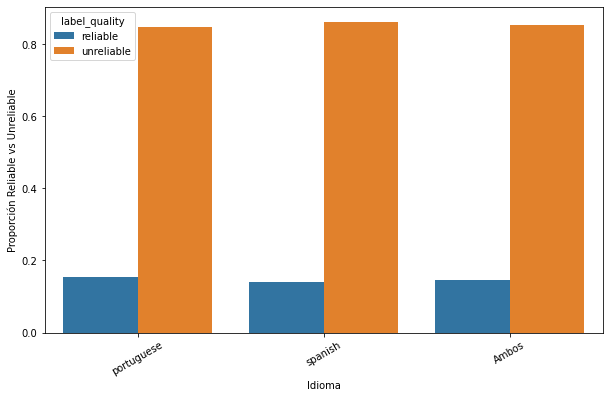

In [22]:
fig = plt.figure(figsize=(10,6))
seaborn.barplot(
    y=df_label_by_language["proportion"],
    x=df_label_by_language["language"],
    hue=df_label_by_language["label_quality"],
    ci=None
)
plt.xticks(rotation=30)
plt.ylabel("Proporción Reliable vs Unreliable")
plt.xlabel("Idioma")
plt.ticklabel_format(style='plain', axis='y')

### Sección B

## Cantidad promedio de palabras del título de la publicacion por categoría.

In [25]:
df_word_count = df[title].apply(lambda s: len(s.split(' '))) \
    .to_frame()\
    .rename(columns={"title": "word_count"})

df[[title, category]] \
    .join(df_word_count) \
    .groupby(category).agg(
        avg_word_count=("word_count", "mean")
)

,avg_word_count
category,
BABY_CAR_SEATS,8.028130
BABY_STROLLERS,7.412146
COFFEE_MAKERS,7.370983
ELECTRIC_DRILLS,8.384296
HAIR_CLIPPERS,8.181577
KITCHEN_SINKS,8.970034
MATTRESSES,8.094033
MEMORY_CARDS,9.346059
MOTORCYCLE_JACKETS,7.540702


In [26]:
df.join(df_word_count).describe()

,word_count
count,646760.000000
mean,7.704054
std,2.509832
min,1.000000
25%,6.000000
50%,8.000000
75%,9.000000
max,113.000000


## Cantidad de stopwords por titulo

In [28]:
nltk.download('punkt')

df[title] \
    .apply(count_stopwords) \
    .to_frame()\
    .rename(columns={"title": "nof_stopwords"}) \
    .join(df_word_count)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\edu_b\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


,nof_stopwords,word_count
0,0,3
1,1,5
2,0,7
3,0,5
4,3,11
...,...,...
646755,0,5
646756,1,8
646757,0,9
646758,3,6


 ## Cantidad de números por título

In [29]:
df[title] \
    .apply(count_digits) \
    .to_frame()\
    .rename(columns={"title": "nof_numbers"})

,nof_numbers
0,0
1,0
2,5
3,3
4,3
...,...
646755,1
646756,0
646757,8
646758,0


In [30]:
df[title] \
    .apply(count_special_chars) \
    .to_frame()\
    .rename(columns={"title": "nof_numbers"})

,nof_numbers
0,0
1,0
2,0
3,0
4,2
...,...
646755,0
646756,0
646757,0
646758,0


In [31]:
dff = df[title] \
    .aggregate({
        "nof_stopwords": count_stopwords,
        "nof_digits": count_digits,
        "nof_special_chars": count_special_chars
    })

## 3. Conclusiones

In [ ]:
# En esta celda hay cosas sueltas, no correr

len(df_dataset[df_dataset.title.apply(count_stopwords) > 0]) / len(df_dataset)


from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
sent = 'This is an example sentence'
fdist = FreqDist()
from nltk.probability import FreqDist
fdist = FreqDist(sent)
fdist.N()


df_stopword_vs_wordcount = df_dataset.title \
    .apply(count_stopwords) \
    .to_frame()\
    .rename(columns={"title": "nof_stopwords"}) \
    .join(df_word_count)

df_stopword_vs_wordcount.nof_stopwords.mean() / df_stopword_vs_wordcount.word_count.mean() 